In [302]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [303]:
df = pd.read_csv('train.csv')

In [304]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [305]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

Age column contains 177 null values and the Cabin column contains 687 null values.

We will drop the cabin column as it has high number of null values. But we will fill the null values in the Age column by the Mean age of the dataset.

In [306]:
mean_age = df["Age"].mean()

In [307]:
print(mean_age)

29.69911764705882


In [308]:
df["Age"] = df["Age"].fillna(mean_age)

In [309]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [310]:
df = df.drop("Cabin", axis = 1)

In [311]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


In [312]:
df.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       2
dtype: int64

Lets see whether the embarked variable is useful or not.

In [313]:
survival_by_port = df.groupby("Embarked")["Survived"].mean()

In [314]:
print(survival_by_port)

Embarked
C    0.553571
Q    0.389610
S    0.336957
Name: Survived, dtype: float64


we can see that there is correlation between survival and the embarked port.


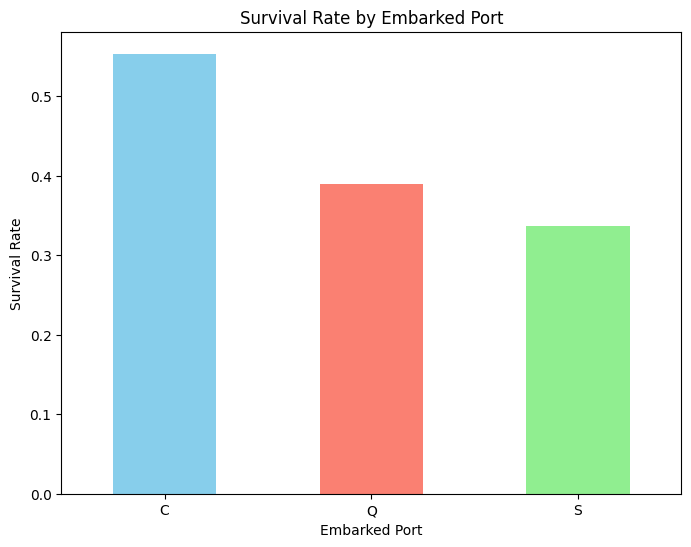

In [315]:
plt.figure(figsize=(8, 6))
survival_by_port.plot(kind='bar', color=['skyblue', 'salmon', 'lightgreen'])
plt.title('Survival Rate by Embarked Port')
plt.xlabel('Embarked Port')
plt.ylabel('Survival Rate')
plt.xticks(rotation=0)
plt.show()

There are more survived people from port C.

But since we have direct measure of Socio-economical status which is "pclass", droping this column will be good idea.

In [316]:
df = df.drop("Embarked", axis = 1)

In [317]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500


We can drop the nominal variables as Name and Ticket, since they are not going to help us in the analysis.

In [318]:
df = df.drop("Name", axis=1)

In [319]:
df = df.drop("Ticket", axis=1)

In [320]:
df.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
0,1,0,3,male,22.0,1,0,7.2500
1,2,1,1,female,38.0,1,0,71.2833
2,3,1,3,female,26.0,0,0,7.9250
3,4,1,1,female,35.0,1,0,53.1000
4,5,0,3,male,35.0,0,0,8.0500


In [321]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Sex          891 non-null    object 
 4   Age          891 non-null    float64
 5   SibSp        891 non-null    int64  
 6   Parch        891 non-null    int64  
 7   Fare         891 non-null    float64
dtypes: float64(2), int64(5), object(1)
memory usage: 55.8+ KB


In [322]:
df["Sex"] =  df["Sex"].replace({"male":1,"female":0})

C:\Users\mayur\AppData\Local\Temp\ipykernel_15824\2394672500.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df["Sex"] =  df["Sex"].replace({"male":1,"female":0})


In [323]:
df.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
0,1,0,3,1,22.0,1,0,7.2500
1,2,1,1,0,38.0,1,0,71.2833
2,3,1,3,0,26.0,0,0,7.9250
3,4,1,1,0,35.0,1,0,53.1000
4,5,0,3,1,35.0,0,0,8.0500


In [324]:
# Create a new 'FamilySize' column by adding SibSp and Parch
df['FamilySize'] = df['SibSp'] + df['Parch']

# Create a new 'isAlone' column. It's 1 if FamilySize is 0, 0 otherwise.
df['isAlone'] = (df['FamilySize'] == 0).astype(int)

# Display the new columns to verify
print(df[['SibSp', 'Parch', 'FamilySize', 'isAlone']].head())

   SibSp  Parch  FamilySize  isAlone
0      1      0           1        0
1      1      0           1        0
2      0      0           0        1
3      1      0           1        0
4      0      0           0        1


In [325]:
df = df.drop("Parch", axis=1)

In [326]:
df = df.drop("SibSp", axis=1)

In [327]:
df.head()

,PassengerId,Survived,Pclass,Sex,Age,Fare,FamilySize,isAlone
0,1,0,3,1,22.0,7.2500,1,0
1,2,1,1,0,38.0,71.2833,1,0
2,3,1,3,0,26.0,7.9250,0,1
3,4,1,1,0,35.0,53.1000,1,0
4,5,0,3,1,35.0,8.0500,0,1


In [328]:
df = df.drop("PassengerId", axis=1)

In [329]:
df.head()

,Survived,Pclass,Sex,Age,Fare,FamilySize,isAlone
0,0,3,1,22.0,7.2500,1,0
1,1,1,0,38.0,71.2833,1,0
2,1,3,0,26.0,7.9250,0,1
3,1,1,0,35.0,53.1000,1,0
4,0,3,1,35.0,8.0500,0,1


Now we have the variables which could be correlatated to the survival.

Lets visualize this the relationship between these variables and the survival

### Survival by Age

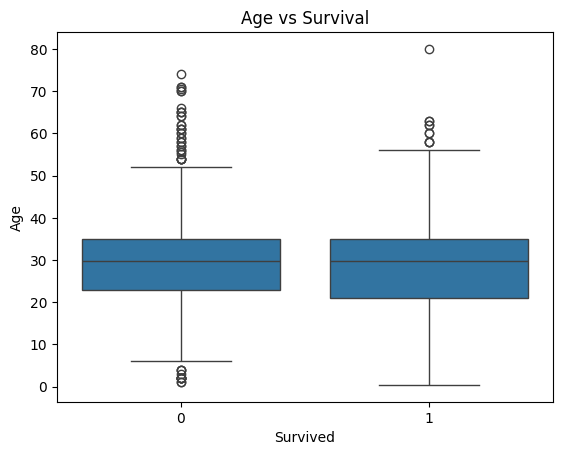

In [330]:
sns.boxplot(x="Survived", y="Age", data=df)
plt.title("Age vs Survival")
plt.xlabel("Survived")
plt.ylabel("Age")
plt.show()

In [331]:
bins = [0, 12, 20, 40, 100]
labels = ['1', '2', '3', '4']
df['AgeGroup'] = pd.cut(df['Age'], bins=bins, labels=labels, right=False)
print(df['AgeGroup'].value_counts())

AgeGroup
3    564
4    163
2     96
1     68
Name: count, dtype: int64


In [332]:
df.head()

,Survived,Pclass,Sex,Age,Fare,FamilySize,isAlone,AgeGroup
0,0,3,1,22.0,7.2500,1,0,3
1,1,1,0,38.0,71.2833,1,0,3
2,1,3,0,26.0,7.9250,0,1,3
3,1,1,0,35.0,53.1000,1,0,3
4,0,3,1,35.0,8.0500,0,1,3


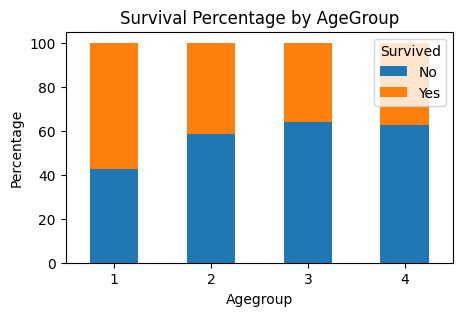

In [333]:
survival_by_AgeGroup = pd.crosstab(df['AgeGroup'], df['Survived'], normalize='index') * 100
survival_by_AgeGroup.plot(kind='bar', stacked=True, figsize=(5, 3))
plt.title('Survival Percentage by AgeGroup')
plt.xlabel('Agegroup')
plt.ylabel('Percentage')
plt.xticks(rotation=0)
plt.legend(title='Survived', labels=['No', 'Yes'])
plt.show()

It is very clear that the if the age is less than 13, then only you have little higher chance of survival. So we will create only one veryable which is "isChild". 

In [334]:
df["isChild"] = (df["AgeGroup"]=="1").astype(int)

In [335]:
print(df["isChild"].sum())

68


In [336]:
df = df.drop("AgeGroup", axis=1)

Lets Drop Age as well.

In [337]:
df = df.drop("Age",axis=1)

In [338]:
df.head()

,Survived,Pclass,Sex,Fare,FamilySize,isAlone,isChild
0,0,3,1,7.2500,1,0,0
1,1,1,0,71.2833,1,0,0
2,1,3,0,7.9250,0,1,0
3,1,1,0,53.1000,1,0,0
4,0,3,1,8.0500,0,1,0


### Survival by Sex

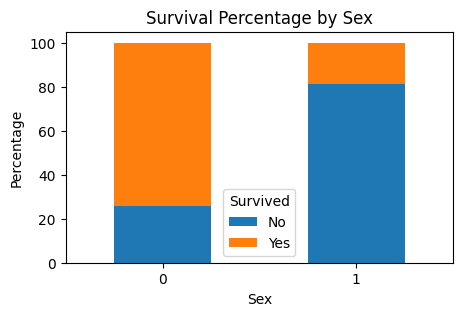

In [339]:
survival_by_sex = pd.crosstab(df['Sex'], df['Survived'], normalize='index') * 100
survival_by_sex.plot(kind='bar', stacked=True, figsize=(5, 3))
plt.title('Survival Percentage by Sex')
plt.xlabel('Sex')
plt.ylabel('Percentage')
plt.xticks(rotation=0)
plt.legend(title='Survived', labels=['No', 'Yes'])
plt.show()

0 is female and 1 is male; We can see that more percentage of female survived and less percentage of male survived. Almost 75% of Females survived and only 20% of Males survived.

### Survival by Class

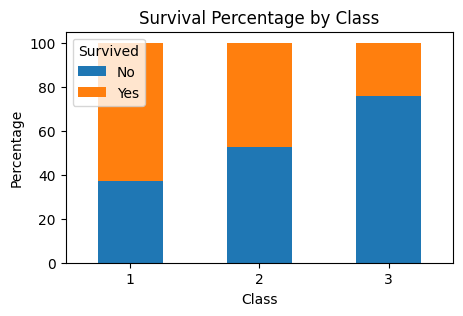

In [340]:
survival_by_class = pd.crosstab(df['Pclass'], df['Survived'], normalize='index') * 100
survival_by_class.plot(kind='bar', stacked=True, figsize=(5, 3))
plt.title('Survival Percentage by Class')
plt.xlabel('Class')
plt.ylabel('Percentage')
plt.xticks(rotation=0)
plt.legend(title='Survived', labels=['No', 'Yes'])
plt.show()

Almost 60% of UpperClass people, 50% of MiddleClass people and only 20% of LowerClass people survived.

We can drop Fare as we alredy have Pclass which represents the socio-economic factor.

In [341]:
df = df.drop("Fare",axis=1)

In [342]:
df.head()

,Survived,Pclass,Sex,FamilySize,isAlone,isChild
0,0,3,1,1,0,0
1,1,1,0,1,0,0
2,1,3,0,0,1,0
3,1,1,0,1,0,0
4,0,3,1,0,1,0


### Survival by FamilySize

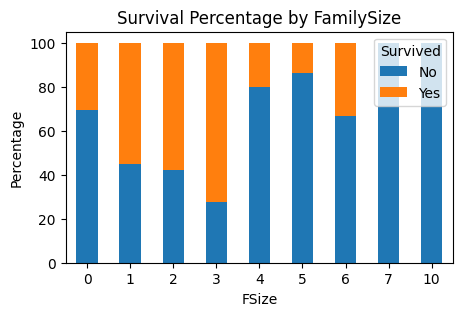

In [343]:
survival_by_FS = pd.crosstab(df['FamilySize'], df['Survived'], normalize='index') * 100
survival_by_FS.plot(kind='bar', stacked=True, figsize=(5, 3))
plt.title('Survival Percentage by FamilySize')
plt.xlabel('FSize')
plt.ylabel('Percentage')
plt.xticks(rotation=0)
plt.legend(title='Survived', labels=['No', 'Yes'])
plt.show()

It is cleare from this picture that if you are alone, the chance of survival is less but if you are with a small family, the chance of survival is high. If you are in a large family, the chance of survival is again low.

In [344]:
#creating new column "isSF" for family with less than or equal to 3 members
df["isSF"] = df["FamilySize"].isin([1, 2, 3]).astype(int) 

In [345]:
df = df.drop("FamilySize",axis=1)

In [346]:
df = df.drop("isAlone",axis=1)

In [355]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype
---  ------    --------------  -----
 0   Survived  891 non-null    int64
 1   Pclass    891 non-null    int64
 2   Sex       891 non-null    int64
 3   isChild   891 non-null    int64
 4   isSF      891 non-null    int64
dtypes: int64(5)
memory usage: 34.9 KB


In [348]:
X = df[["Pclass","Sex","isChild","isSF"]].values

In [349]:
print(X)

[[3 1 0 1]
 [1 0 0 1]
 [3 0 0 0]
 ...
 [3 0 0 1]
 [1 1 0 0]
 [3 1 0 0]]


In [354]:
Y = df[["Survived"]].values

Now our data is ready, the next step is to scale the data. We will use the Z-Score scaling.

## Scaling the data 

In [368]:
# importing our functions package
from model_functions import scaled

In [369]:
# Lets scale out freatures. 
X_scaled, X_mean, X_std = scaled(X)

In [373]:
print(X_scaled)

[[ 0.82737724  0.73769513 -0.28744485  1.4322604 ]
 [-1.56610693 -1.35557354 -0.28744485  1.4322604 ]
 [ 0.82737724 -1.35557354 -0.28744485 -0.69819706]
 ...
 [ 0.82737724 -1.35557354 -0.28744485  1.4322604 ]
 [-1.56610693  0.73769513 -0.28744485 -0.69819706]
 [ 0.82737724  0.73769513 -0.28744485 -0.69819706]]


Now we have scaled our training features.

In [374]:
# scaling target variable
Y_scaled = scaled(Y)[0]

In [378]:
Y_scaled.shape

(891, 1)

In [392]:
X_scaled.shape

(891, 4)

We have successfuly scaled our training data using the Z-Score scaling